In [1]:
import mysql.connector
Airbnb_41_db=mysql.connector.connect(host="localhost",user="root",password="@whisper301",database="Airbnb_41")
db_cursor=Airbnb_41_db.cursor()

In [2]:
sql_stmnt = "select DATEDIFF(date_first_booking, DATE(timestamp_first_active)) as time_first_booking from users_41;"
db_cursor.execute(sql_stmnt)
data = db_cursor.fetchall()

In [3]:
cleaned_data = []
for i in range(len(data)):
    if type(data[i][0]) != type(None):
        cleaned_data.append(data[i][0])
    else:
        continue    

<AxesSubplot:ylabel='Count'>

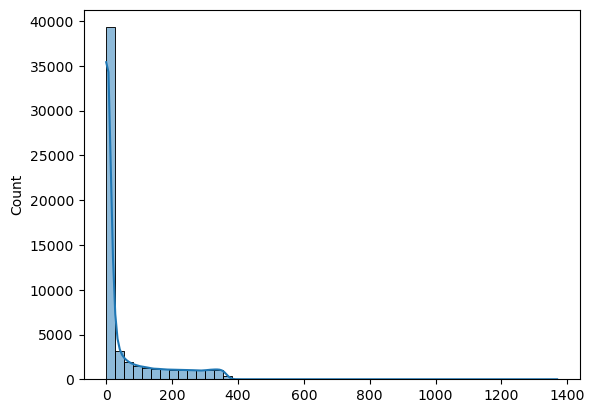

In [4]:
import seaborn as sns
sns.histplot(data=cleaned_data,bins=50,kde=True)

In [5]:
import numpy as np
first_booking_data_avg = np.average(cleaned_data)
first_booking_data_var= np.var(cleaned_data)
print(f'The average is {first_booking_data_avg} and variance is {first_booking_data_var}')

The average is 52.69153972095672 and variance is 8962.28132933484


In [6]:
sql_stmnt_age_time = "SELECT SUM(sessions_41.secs_elapsed)/3600 as Total_time_in_Minutes,case when users_41.age>=60 THEN 'Elder_people' when users_41.age BETWEEN 40 and 60 THEN 'Middle_age' ELSE  'young_people' END AS Age_Group from users_41 inner join sessions_41 on users_41.id = sessions_41.user_id group by Age_group;"
db_cursor.execute(sql_stmnt_age_time)
age_time_data = db_cursor.fetchall()

In [7]:
import pandas as pd
df = pd.DataFrame(age_time_data, columns =['Time in Hours( in Lakhs)','Age_Group'])

<AxesSubplot:xlabel='Age_Group', ylabel='Time in Hours( in Lakhs)'>

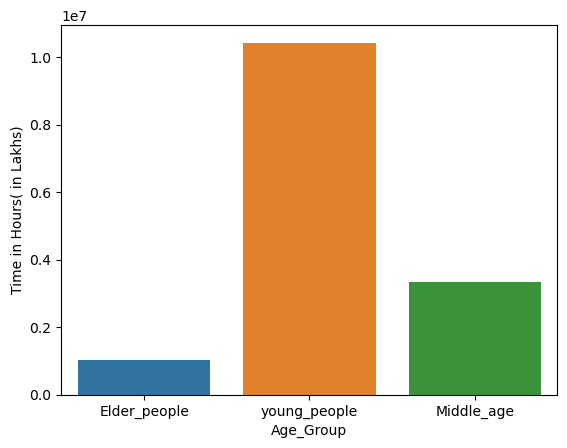

In [8]:
sns.barplot(data=df,x="Age_Group",y="Time in Hours( in Lakhs)")

In [9]:
sql_stmnt_pop_age_gender = "SELECT SUM(age_gender_bkts_41.population_in_thousands) as Total_population_in_thousands,users_41.gender,case when users_41.age>=60 THEN 'Elder_people' when users_41.age BETWEEN 40 and 60 THEN 'Middle_age' ELSE  'young_people' END AS Age_Group from age_gender_bkts_41 inner join users_41 on age_gender_bkts_41.country_destination = users_41.country_destination group by users_41.gender,Age_Group;"
db_cursor.execute(sql_stmnt_pop_age_gender)
pop_age_gender_data = db_cursor.fetchall()

In [10]:
pop_age_gender_df = pd.DataFrame(pop_age_gender_data, columns =['Total_population_in_thousands','Gender','Age_Group'])
pop_age_gender_df

,Total_population_in_thousands,Gender,Age_Group
0,1483136112,MALE,Middle_age
1,4403118726,MALE,young_people
2,5261194367,FEMALE,young_people
3,1499294096,FEMALE,Middle_age
4,461932101,FEMALE,Elder_people
5,348425167,MALE,Elder_people
6,24673980,OTHER,young_people
7,9882173,OTHER,Middle_age
8,975396,OTHER,Elder_people


In [11]:
sql_stmnt_age_country = "select age, country_destination from users_41 where country_destination != 'NDF';"
db_cursor.execute(sql_stmnt_age_country)
age_country_data = db_cursor.fetchall()

<AxesSubplot:xlabel='Age', ylabel='Count'>

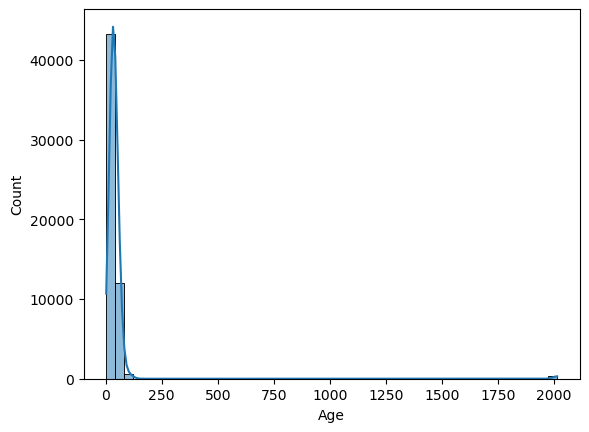

In [12]:
age_country_df = pd.DataFrame(age_country_data, columns =['Age','country_destination'])
sns.histplot(data=age_country_df['Age'],bins=50,kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

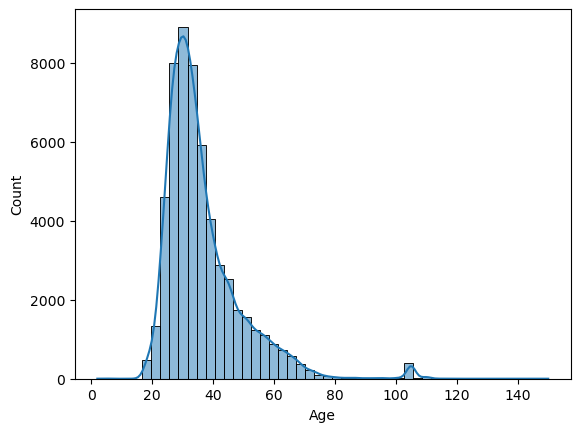

In [13]:
sql_stmnt_age_country_2 = "select age, country_destination from users_41 where country_destination != 'NDF' and age<250;"
db_cursor.execute(sql_stmnt_age_country_2)
age_country_data = db_cursor.fetchall()
age_country_df = pd.DataFrame(age_country_data, columns =['Age','country_destination'])
sns.histplot(data=age_country_df['Age'],bins=50,kde=True)

<AxesSubplot:xlabel='country_destination', ylabel='Age'>

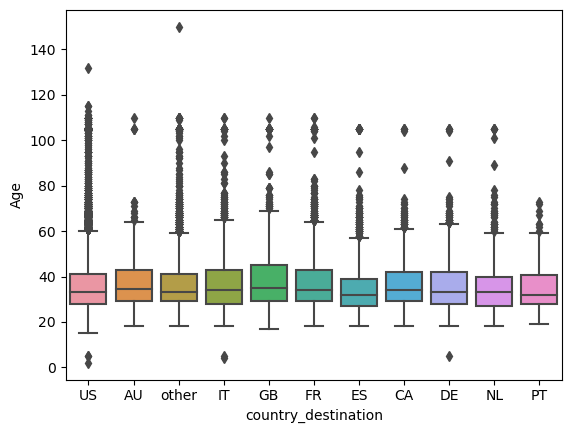

In [14]:
sns.boxplot(x = age_country_df['country_destination'],
            y = age_country_df['Age'])

In [15]:
sql_stmnt_age_time_spent= "select users_41.age, sessions_41.secs_elapsed, users_41.date_first_booking from users_41 inner join sessions_41 on users_41.id = sessions_41.user_id and age<250"
db_cursor.execute(sql_stmnt_age_time_spent)
age_time_spent_data = db_cursor.fetchall()

#age_country_df = pd.DataFrame(age_country_data, columns =['Age','country_destination'])

<AxesSubplot:xlabel='Age', ylabel='secs_elapsed'>

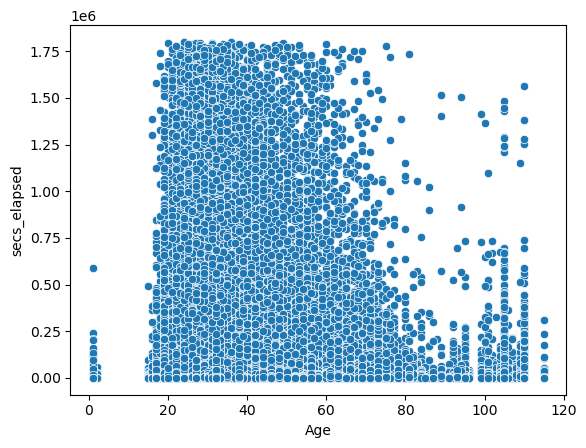

In [16]:
data_without_bookings=[tuple_data  for tuple_data in age_time_spent_data if type(tuple_data[2])==type(None)]
data_without_bookings_df = pd.DataFrame(data_without_bookings, columns =['Age','secs_elapsed','first_booking'])
sns.scatterplot(data=data_without_bookings_df,x='Age',y='secs_elapsed')


In [46]:
sql_stmnt_count_count = "with count_total_table as( select count(users_41.country_destination) as Total,users_41.country_destination as dest_country from users_41 inner join countries_41  on countries_41.country_destination = users_41.country_destination group by users_41.country_destination) select count_total_table.dest_country,countries_41.lat_destination,countries_41.long_destination,count_total_table.Total from count_total_table inner join countries_41 on count_total_table.dest_country = countries_41.country_destination;"
db_cursor.execute(sql_stmnt_count_count)
country_count_data = db_cursor.fetchall()
country_count_data_df = pd.DataFrame(country_count_data, columns =['Destination_country','Latitude','Longitude','Count'])

In [47]:
country_count_data_df

,Destination_country,Latitude,Longitude,Count
0,AU,-27,133,371
1,CA,62,-97,873
2,DE,51,10,728
3,ES,40,-2,1428
4,FR,46,2,3062
5,GB,55,-3,1477
6,IT,42,13,1669
7,NL,52,5,499
8,PT,40,-8,135
9,US,37,-96,39737


In [55]:
sql_stmnt_singnup_gender = "select count(users_41.gender),users_41.signup_method,users_41.gender from users_41 group by users_41.gender,users_41.signup_method;"
db_cursor.execute(sql_stmnt_singnup_gender)
signup_gender_data = db_cursor.fetchall()
signup_gender_data_df = pd.DataFrame(signup_gender_data, columns =['Count','Signup method','Gender'])

<AxesSubplot:xlabel='Signup method', ylabel='Count'>

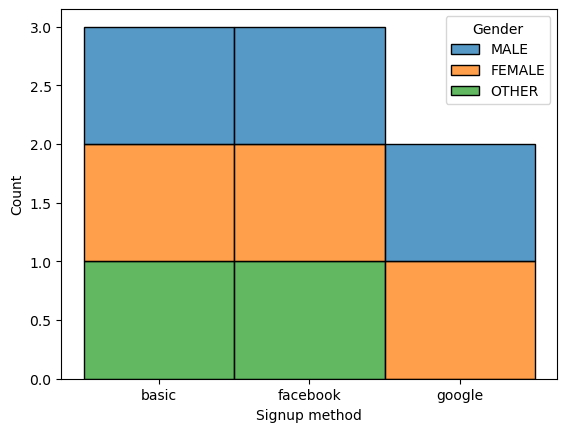

In [75]:
sns.histplot(data=signup_gender_data_df,x='Signup method',hue='Gender',stat='count',multiple='stack')

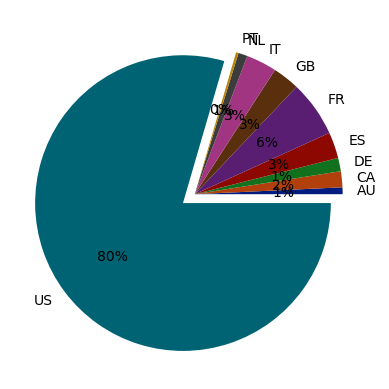

In [61]:
import matplotlib.pyplot as plt
import seaborn

values = country_count_data_df['Count']
label = country_count_data_df['Destination_country']
palette_color = seaborn.color_palette('dark')
plt.pie(values,labels=label,colors=palette_color,explode=[0,0,0,0,0,0,0,0,0,0.1],autopct='%.0f%%')
plt.show()


In [62]:
sql_stmnt_gender_count = "select count(users_41.gender),users_41.gender from users_41 group by users_41.gender;"
db_cursor.execute(sql_stmnt_gender_count)
gender_count_data = db_cursor.fetchall()
gender_count_data_df = pd.DataFrame(gender_count_data, columns =['Count','Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Count'>

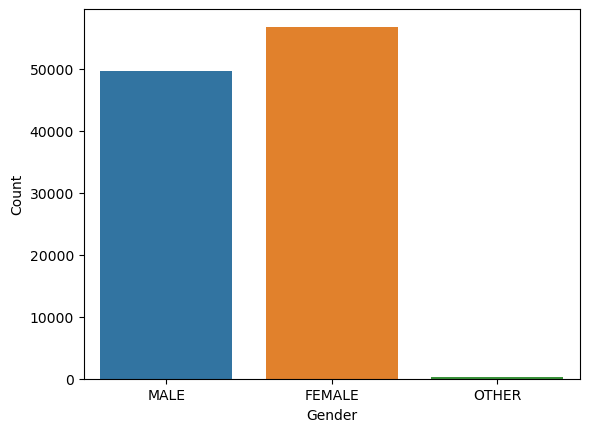

In [65]:
sns.barplot(data=gender_count_data_df,x='Gender',y='Count')

In [67]:
sql_stmnt_gender_country_count = "select count(id),gender,country_destination from users_41 group by country_destination,gender;"
db_cursor.execute(sql_stmnt_gender_country_count)
gender_country_count_data = db_cursor.fetchall()
gender_country_data_df = pd.DataFrame(gender_country_count_data, columns =['Count','Gender','country_destination'])

<AxesSubplot:xlabel='country_destination'>

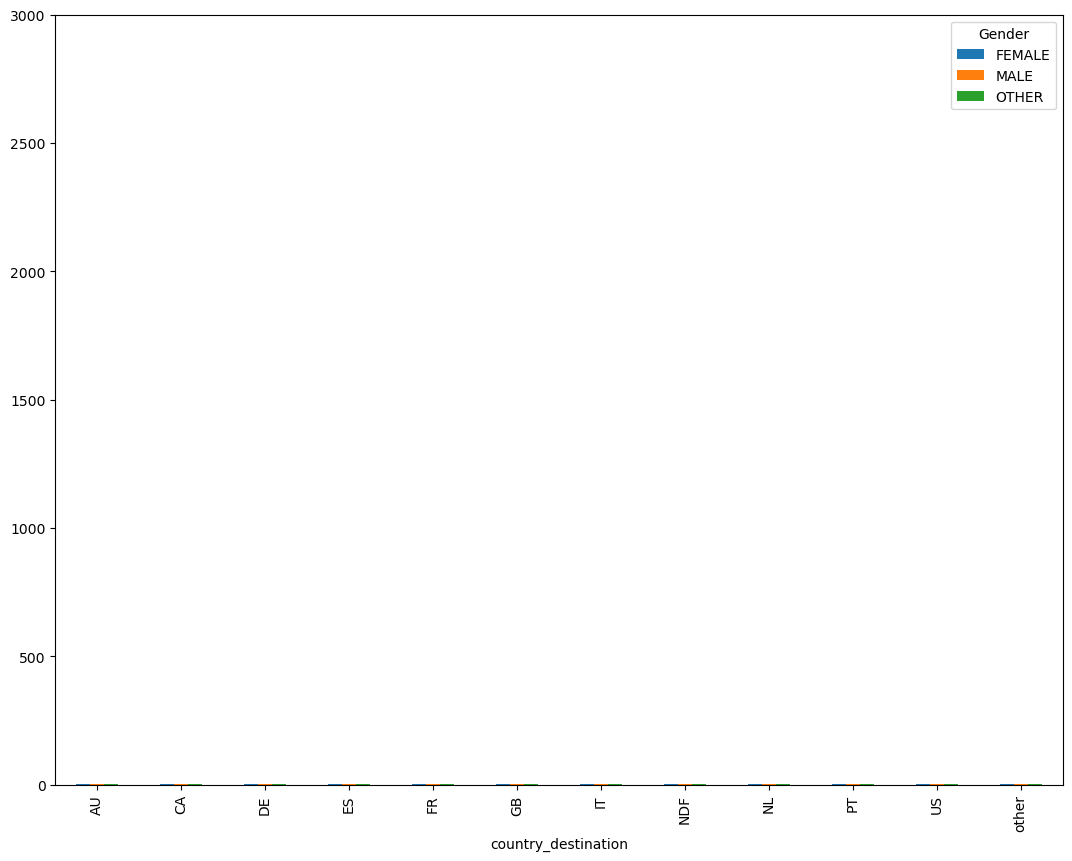

In [73]:
CrosstabResult=pd.crosstab(index= gender_country_data_df['country_destination'],columns=gender_country_data_df['Gender'])
#print(CrosstabResult)
CrosstabResult.plot.bar(ylim=(0,3000),figsize = (13,10))

In [70]:
gender_country_data_df

,Count,Gender,country_destination
0,18410,MALE,US
1,23571,MALE,NDF
2,21224,FEMALE,US
3,195,FEMALE,AU
4,26957,FEMALE,NDF
5,2937,FEMALE,other
6,3256,MALE,other
7,647,MALE,IT
8,826,FEMALE,GB
9,1807,FEMALE,FR
